In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from adjustText import adjust_text


In [26]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

In [27]:
# import the dataset
df = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

# Concatenate the two datasets
df = pd.concat([df_train, df], ignore_index=True, sort=False)
df = df.dropna()
df = df.drop([ 'id', 'Unnamed: 0'], axis=1)
df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [30]:
df.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Select K best

In [31]:
# Define features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

k = 10

# Remove non-numeric columns for feature selection
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Apply SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_numeric, y)

# Get selected feature names and their scores
feature_scores = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
})

# Sort by score in descending order
feature_scores = feature_scores.sort_values('Score', ascending=False)
print("Top 10 features selected:")
print(feature_scores.head(10))

# Get the selected feature names
selected_features = X_numeric.columns[selector.get_support()]
print("\nSelected features:", list(selected_features))

df = df[selected_features.union(['satisfaction'])]

Top 10 features selected:
                   Feature         Score  P-value
7          Online boarding  43536.067932      0.0
9   Inflight entertainment  24420.109349      0.0
8             Seat comfort  17909.155048      0.0
10        On-board service  15012.750664      0.0
11        Leg room service  14019.196751      0.0
15             Cleanliness  13463.119100      0.0
1          Flight Distance  12638.567056      0.0
2    Inflight wifi service  11298.413737      0.0
12        Baggage handling   8533.333088      0.0
14        Inflight service   8270.629439      0.0

Selected features: ['Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Inflight service', 'Cleanliness']


In [32]:
# Check the current values of satisfaction
print("- Original satisfaction values:")
print(df['satisfaction'].value_counts())

# Transform 'satisfaction' into a dummy variable (1 for satisfied, 0 for neutral or dissatisfied)
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Verify the transformation
print("\n- Transformed satisfaction values:")
print(df['satisfaction'].value_counts())

- Original satisfaction values:
satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

- Transformed satisfaction values:
satisfaction
0    73225
1    56262
Name: count, dtype: int64


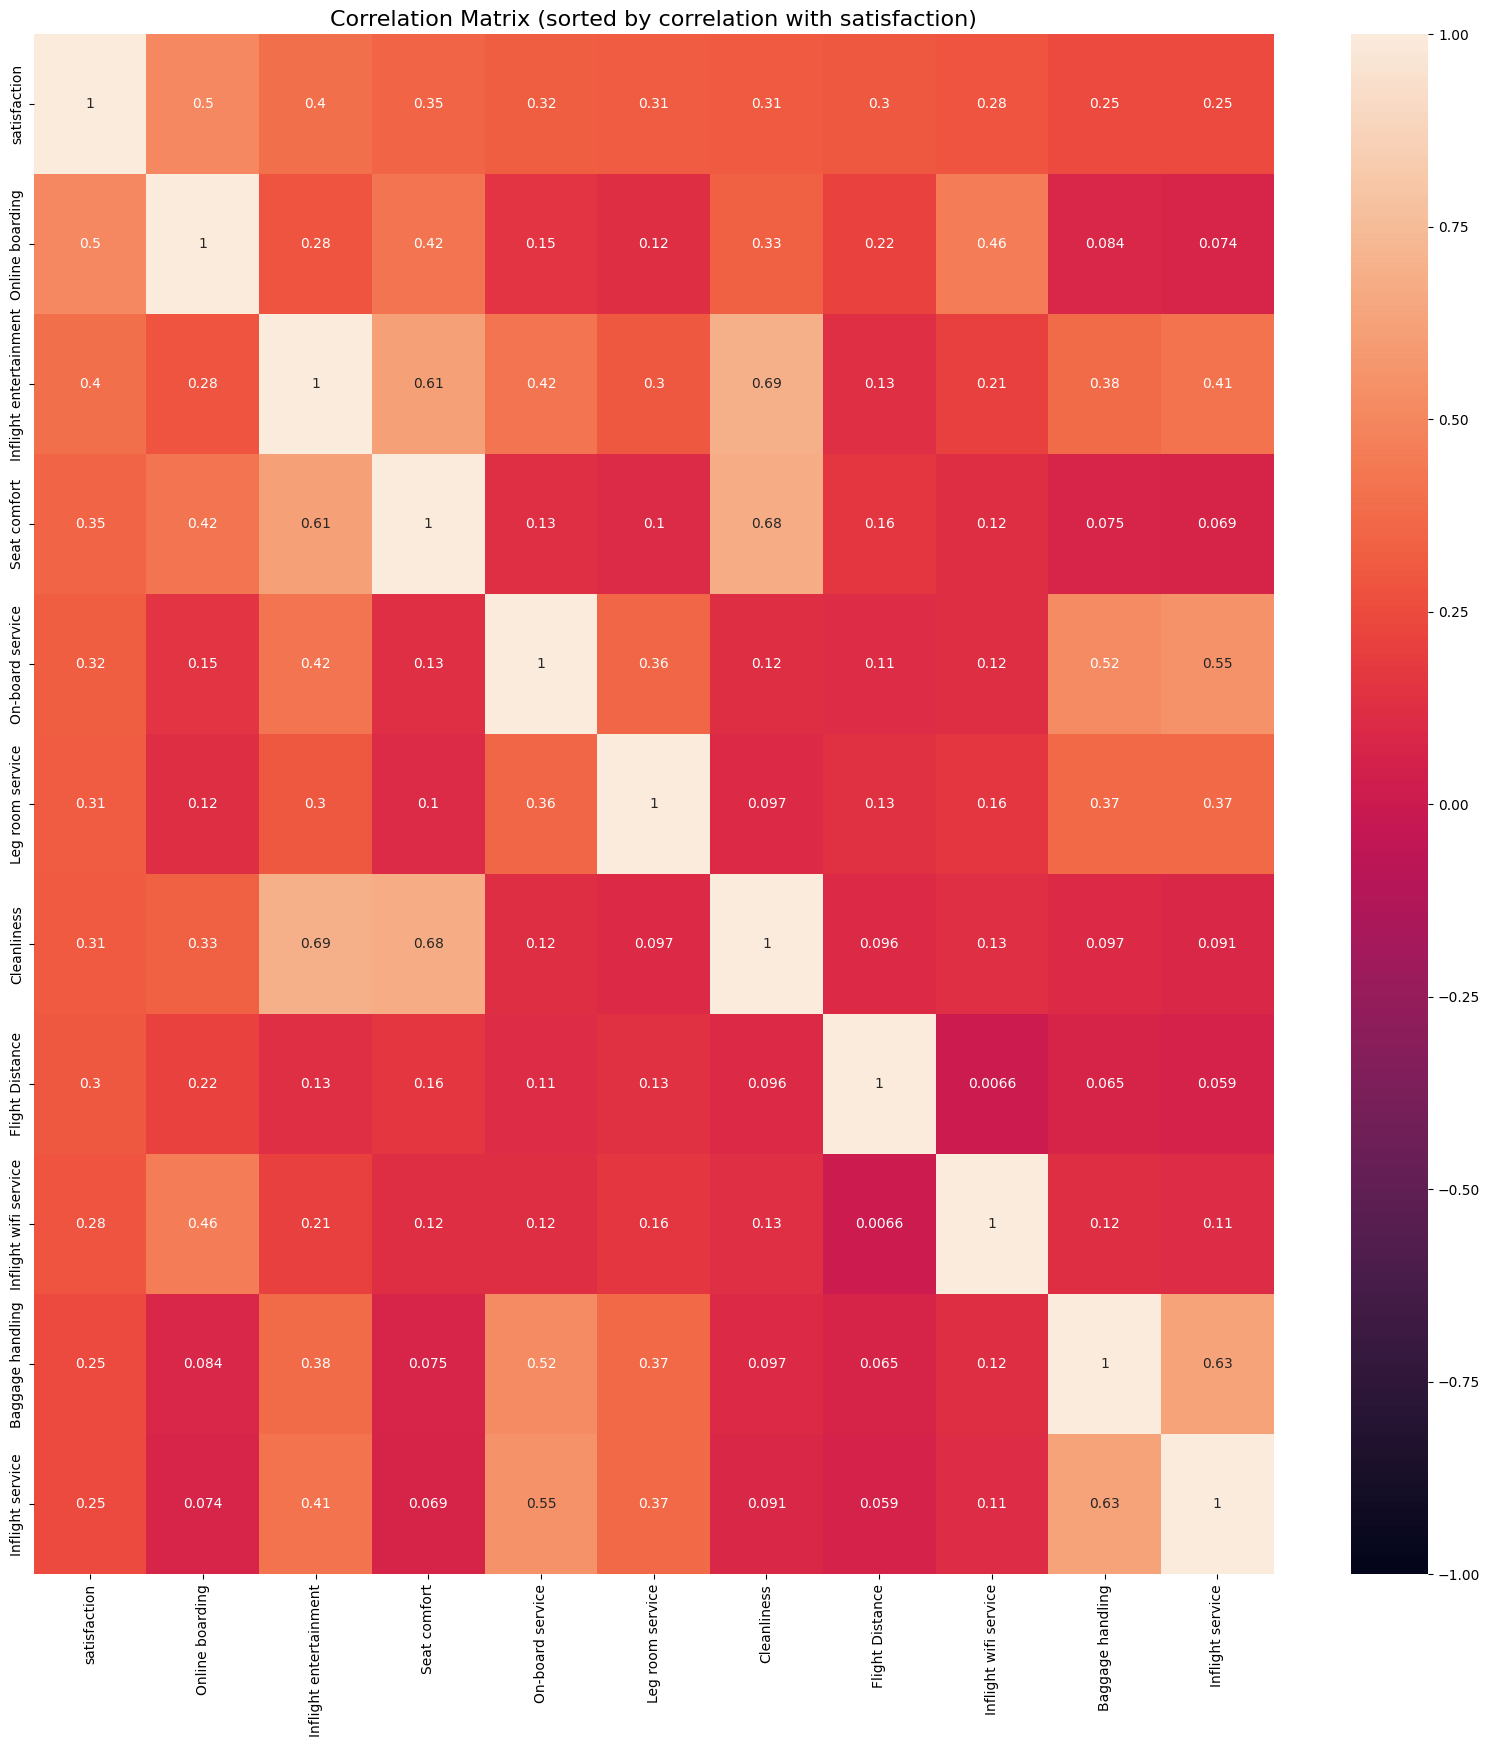

In [33]:
corr = df.corr()

# Extract correlations with satisfaction
satisfaction_corr = corr['satisfaction'].drop('satisfaction')

# Sort by correlation value (descending)
sorted_corr = satisfaction_corr.sort_values(ascending=False)

# Create new column order with satisfaction first, then others by correlation
new_col_order = ['satisfaction'] + sorted_corr.index.tolist()

# Reindex both rows and columns
ordered_corr = corr.reindex(index=new_col_order, columns=new_col_order)

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(ordered_corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix (sorted by correlation with satisfaction)', fontsize=16)
plt.show()


## 1. Standardization

In [34]:
# Select numerical columns
y_col = 'satisfaction'

# Select numerical columns
df = df.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(df.drop(y_col, axis=1))
df_standardized = pd.DataFrame(df_standardized, columns=df.columns.drop(y_col))
y = df[y_col]
df_standardized.head()


,Baggage handling,Cleanliness,Flight Distance,Inflight entertainment,Inflight service,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort
0,0.311941,1.304624,-0.731999,1.230701,1.153847,0.204220,-0.266751,0.479240,-0.187111,1.181364
1,-0.535461,-1.740400,-0.957550,-1.767475,0.303947,0.204220,1.252860,-1.851712,-0.187111,-1.850863
2,0.311941,1.304624,-0.048329,1.230701,0.303947,-0.548095,-0.266751,0.479240,1.293662,1.181364
3,-0.535461,-0.979144,-0.629749,-1.017931,0.303947,-0.548095,1.252860,-1.074728,-0.927497,-1.092806
4,0.311941,-0.217888,-0.978601,-0.268387,-0.545953,0.204220,0.493055,-0.297744,1.293662,1.181364


## 2. PCA

In [ ]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)


### Explained Variance

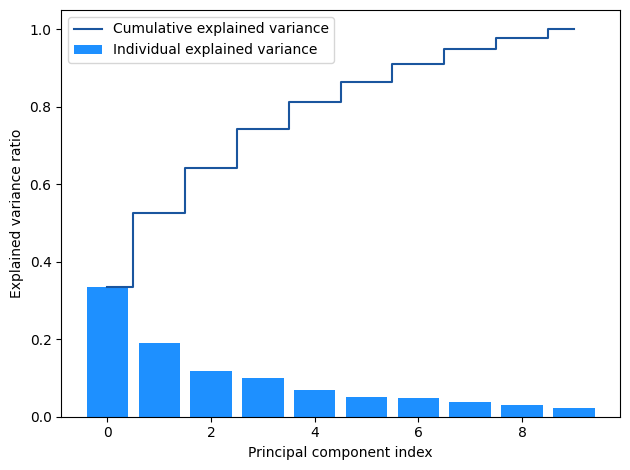

In [36]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color=color_blue_light)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_blue)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')


Minimum number of components to explain 80.0% of variance: 5


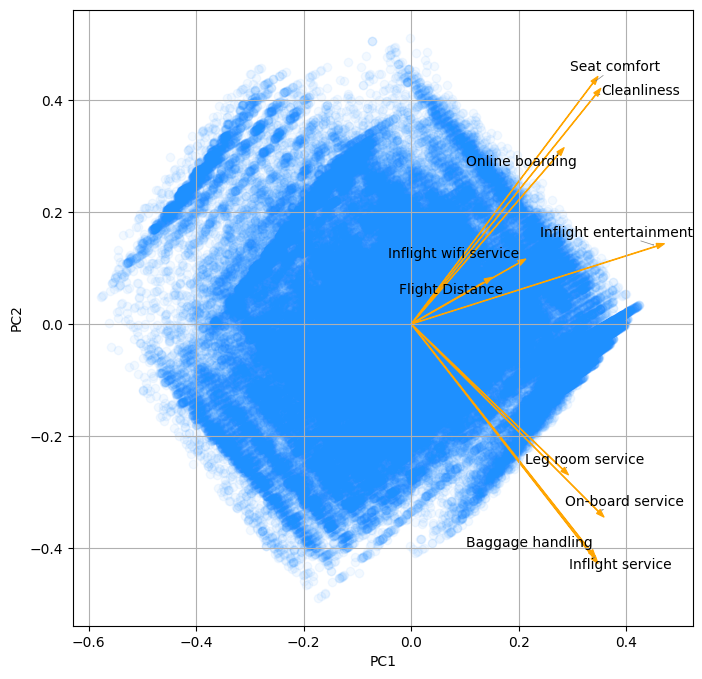

In [38]:
# Define a plot function
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(8, 8))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.05, color=color_blue_light)
    
    texts = []
    multplier = 1.0
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=color_orange, alpha=1, lw=0.8, head_width=0.01)
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, labels[i], color=color_black, ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

## 3. Graphs meaning

 The graphical analysis aims to understand which variables influence each principal component:

- The code loops through each principal component up to index_selected to create individual plots.
- It calculates the standard deviation of the absolute values of the sorted loadings.
- The bars in the plot are colored based on whether the loading is above or below the standard deviation.

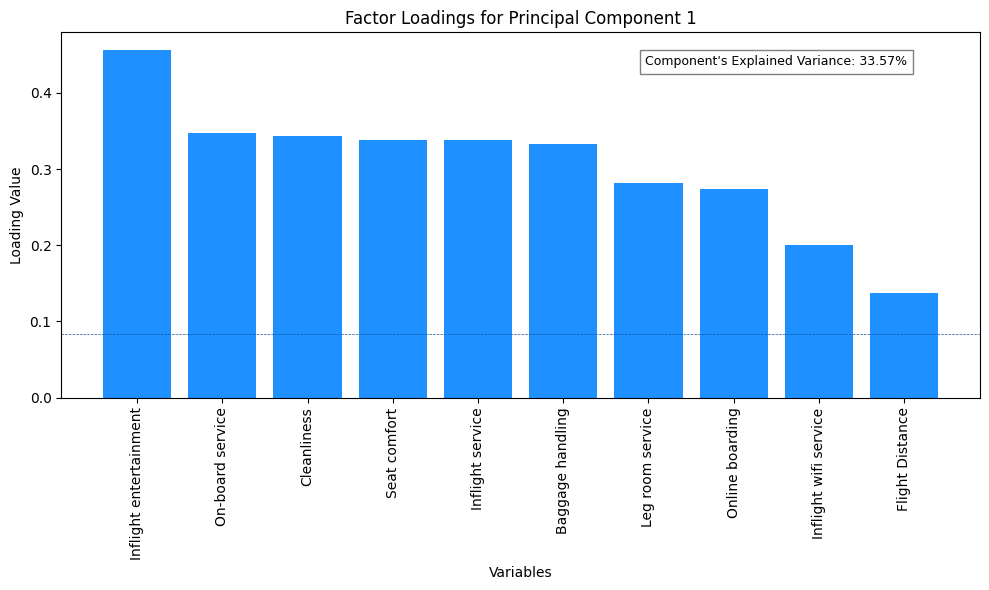

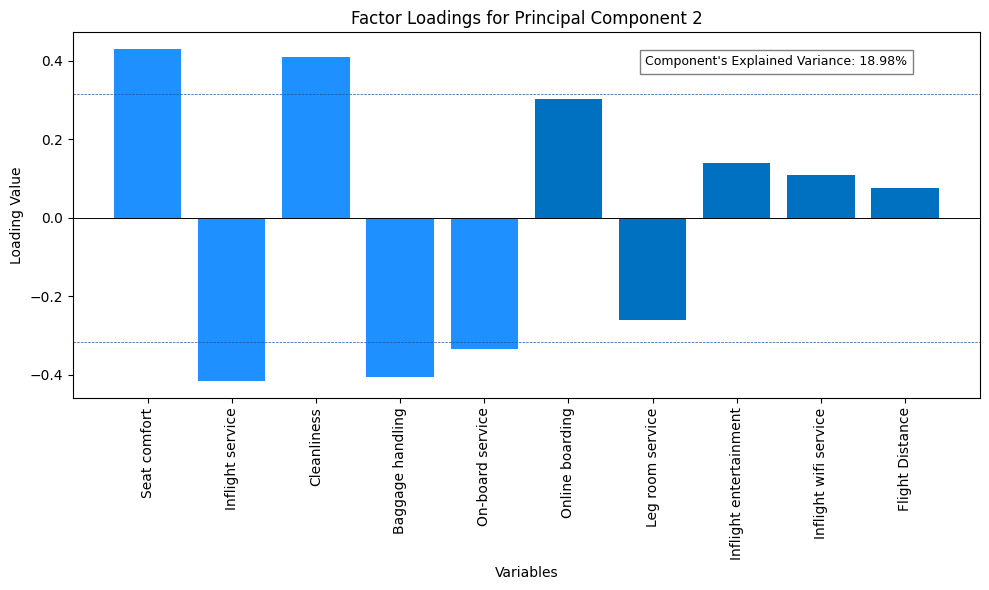

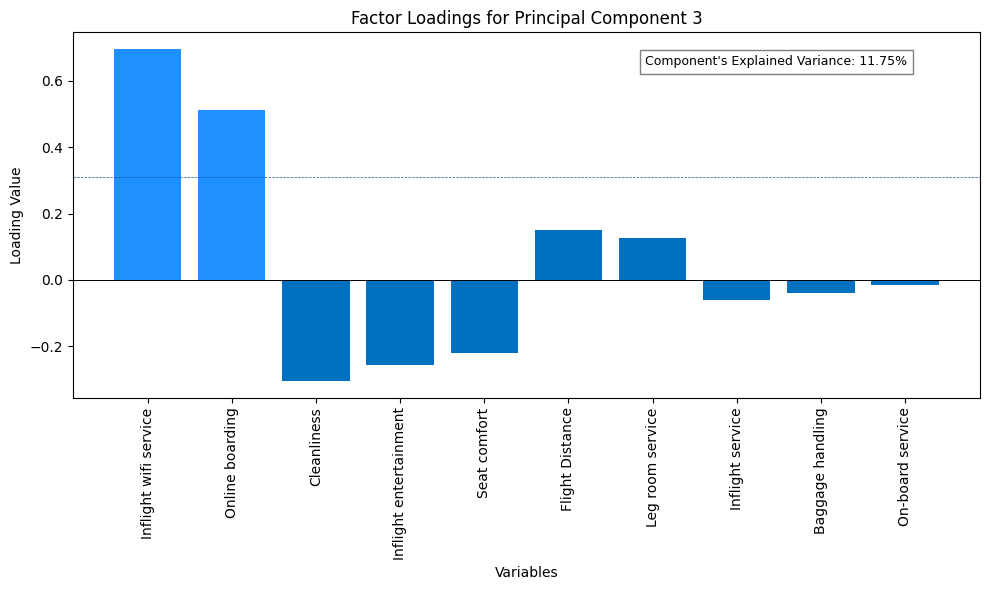

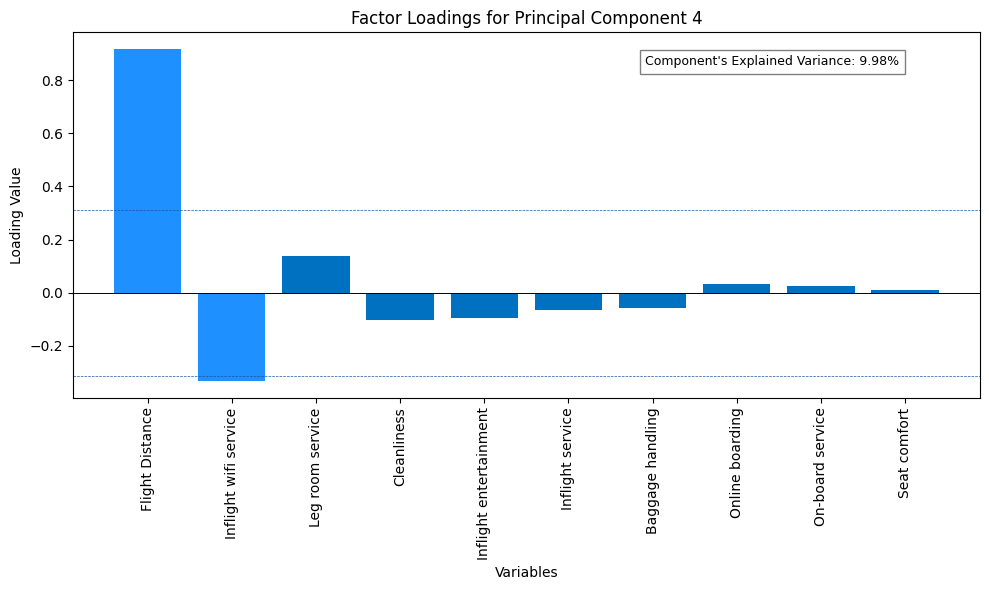

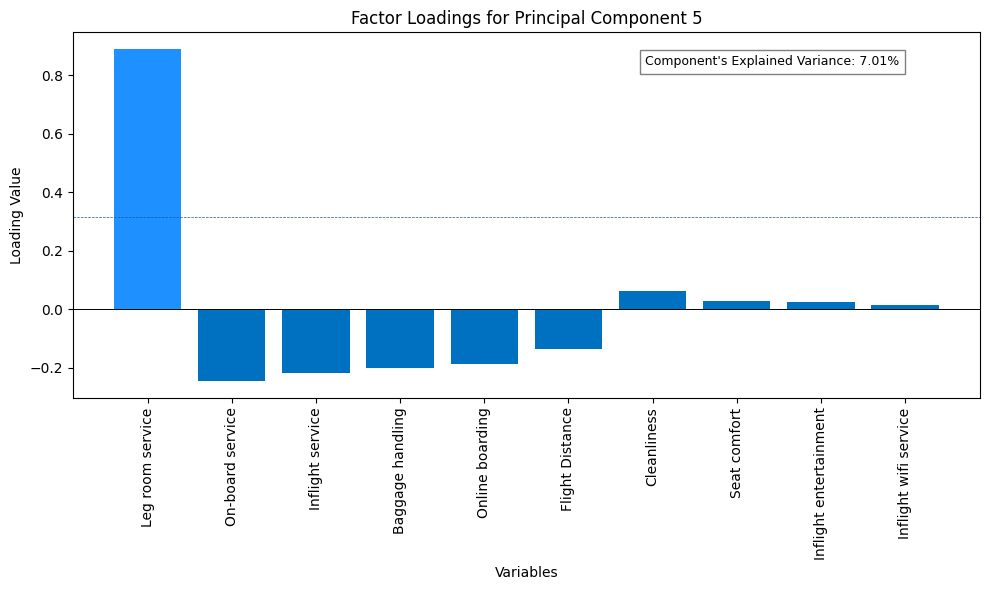

In [39]:
loadings = pca.components_.T

# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = [color_blue_light if abs(loading) >= std_loading else color_blue_vivid for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)

    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

## 4. Comparison

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_standardized, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy


0.8060854120009268

In [41]:
# Make regression model on PCA
X = x_new[:, :index_selected]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
new_accuracy = metrics.accuracy_score(y_test, y_pred)
new_accuracy


0.8004092980152907

In [42]:
# Calculate how much better the original model is compared to the PCA model
improvement_percentage = ((accuracy - new_accuracy) / new_accuracy) * 100
print(f'Original model accuracy: {accuracy:.4f}')
print(f'PCA model accuracy: {new_accuracy:.4f}')
print(f'Accuracy improvement without PCA: {improvement_percentage:.2f}%')


Original model accuracy: 0.8061
PCA model accuracy: 0.8004
Accuracy improvement without PCA: 0.71%


## 5. Plot 3D PCA

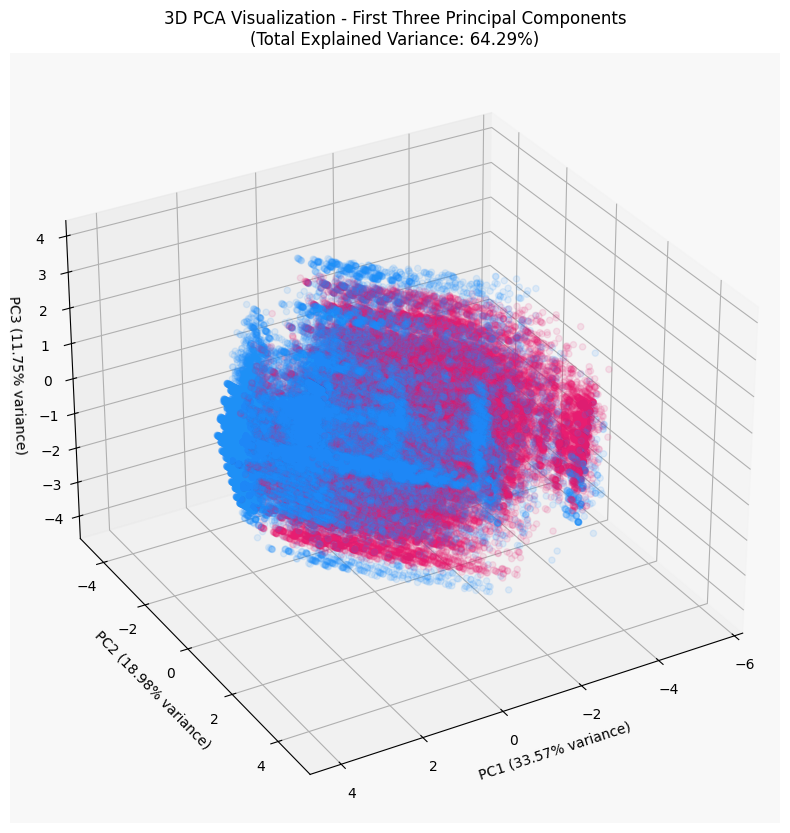

In [43]:
# plot 3d PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a custom colormap using the predefined colors
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list(
    "custom", [color_pink, color_blue_light]
)


# Plot the data with the custom colormap
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=custom_cmap, s=20, alpha=0.1, label='satisfaction')


# Set labels with defined colors
ax.set_xlabel(f'PC1 ({round(exp_var_pca[0] * 100, 2)}% variance)')
ax.set_ylabel(f'PC2 ({round(exp_var_pca[1] * 100, 2)}% variance)')
ax.set_zlabel(f'PC3 ({round(exp_var_pca[2] * 100, 2)}% variance)')

# Add grid for better spatial reference
ax.grid(True, alpha=0.3)

# Set background color for better contrast
ax.set_facecolor('#f8f8f8')

# Find the optimal viewing angle
ax.view_init(elev=30, azim=60)
total_var = round(sum(exp_var_pca[:3]) * 100,2)
plt.title(f'3D PCA Visualization - First Three Principal Components\n(Total Explained Variance: {total_var}%)', )

plt.show()


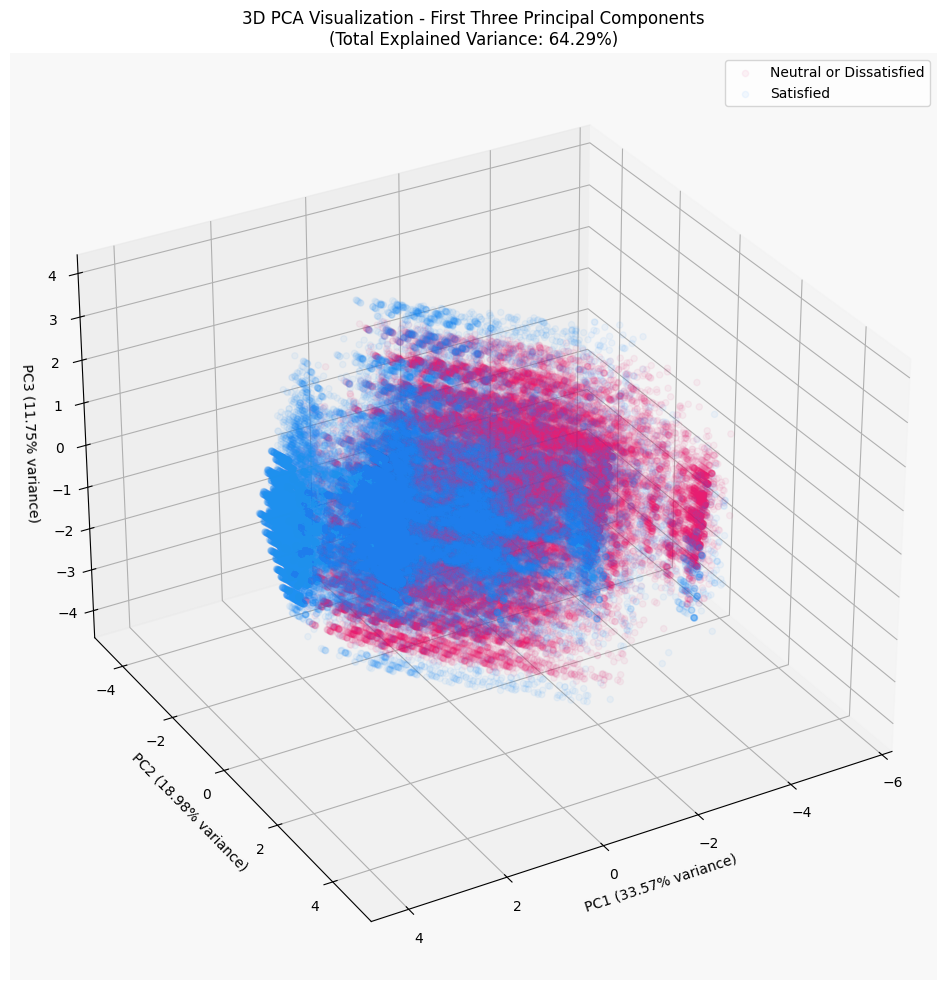

In [44]:
# plot 3d PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create masks for each satisfaction class
mask_satisfied = (y == 1)
mask_dissatisfied = (y == 0)

# Plot each class separately with distinct colors
ax.scatter(X[mask_dissatisfied, 0], X[mask_dissatisfied, 1], X[mask_dissatisfied, 2], 
           c=color_pink, s=20, alpha=0.05, label='Neutral or Dissatisfied')
ax.scatter(X[mask_satisfied, 0], X[mask_satisfied, 1], X[mask_satisfied, 2], 
           c=color_blue_light, s=20, alpha=0.05, label='Satisfied')

# Set labels with defined colors
ax.set_xlabel(f'PC1 ({round(exp_var_pca[0] * 100, 2)}% variance)')
ax.set_ylabel(f'PC2 ({round(exp_var_pca[1] * 100, 2)}% variance)')
ax.set_zlabel(f'PC3 ({round(exp_var_pca[2] * 100, 2)}% variance)')

# Add grid for better spatial reference
ax.grid(True, alpha=0.3)

# Set background color for better contrast
ax.set_facecolor('#f8f8f8')

# Find the optimal viewing angle
ax.view_init(elev=30, azim=60)

# Add a legend
plt.legend(loc='upper right')

total_var = round(sum(exp_var_pca[:3]) * 100, 2)
plt.title(f'3D PCA Visualization - First Three Principal Components\n(Total Explained Variance: {total_var}%)')

plt.tight_layout()
plt.show()


Logistic Regression Coefficients for Principal Components:
  Principal Component  Coefficient  Explained Variance (%)
0                 PC1     0.908032               33.567074
1                 PC2     0.237707               18.976835
2                 PC3     0.604516               11.749019
3                 PC4     0.456908                9.981017
4                 PC5     0.020037                7.014490


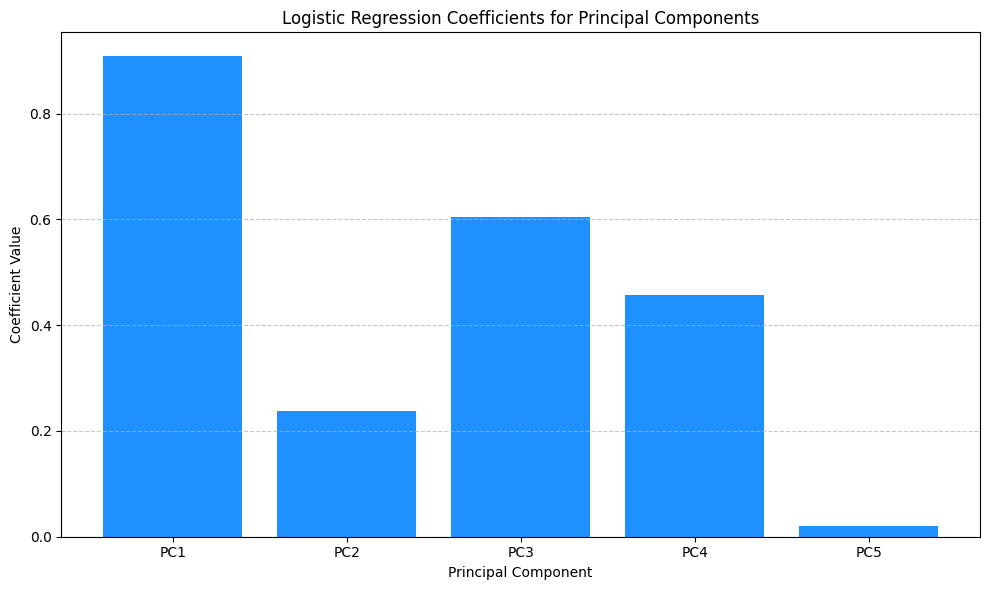

In [45]:
# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients and explained variance
coef_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(index_selected)],
    'Coefficient': coefficients,
    'Explained Variance (%)': [exp_var_pca[i] * 100 for i in range(index_selected)]
})

# Display the DataFrame
print("Logistic Regression Coefficients for Principal Components:")
print(coef_df)

# Create a bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(coef_df['Principal Component'], coef_df['Coefficient'], color=color_blue_light)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Color negative coefficients differently
for i, bar in enumerate(bars):
    if coefficients[i] < 0:
        bar.set_color(color_pink)

plt.title('Logistic Regression Coefficients for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()